In [16]:
import pandas as pd
import requests


In [17]:
# Define the URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file to write the content
    with open('diabetes_health_indicators.csv', 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully!")
else:
    print(f"Failed to download dataset. Status code: {response.status_code}")


# Load the dataset into a pandas DataFrame
df = pd.read_csv('diabetes_health_indicators.csv')

# Preview the first few rows
print(df.head())


Dataset downloaded successfully!
   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  In

In [18]:
# Threshold for dropping columns with too many missing values
threshold = 0.1 * len(df)

# Check for missing values and count them
missing_data = df.isnull().sum()
print("Missing values per feature:\n", missing_data)

# Drop columns where missing data exceeds the threshold
df = df.drop(columns=missing_data[missing_data > threshold].index)

# For remaining columns, fill missing values with mean (for continuous) or mode (for categorical)
for column in df.columns:
    if df[column].dtype == 'object':  # If the feature is categorical
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # If the feature is continuous
        df[column] = df[column].fillna(df[column].mean())

# Check again to confirm missing values have been handled
print("Remaining missing values after handling:\n", df.isnull().sum())


Missing values per feature:
 ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Remaining missing values after handling:
 ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlc

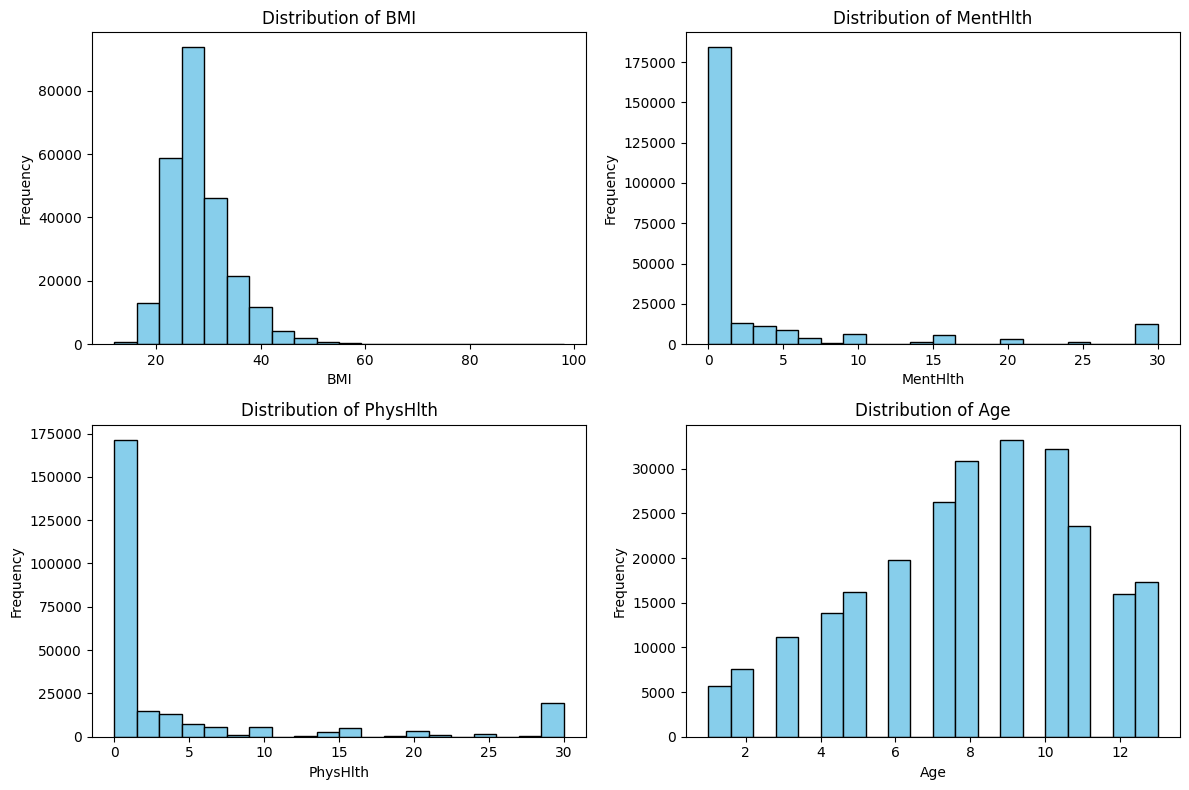

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


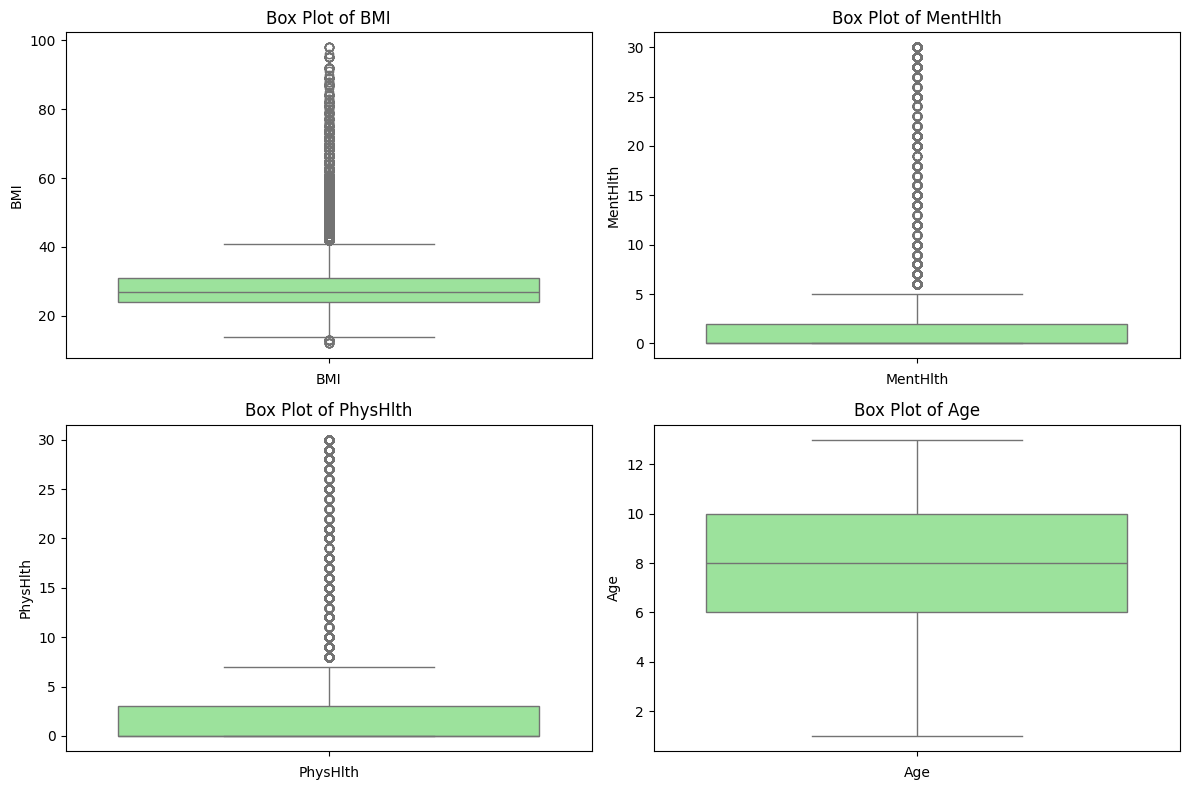

<ipython-input-19-97102de1c733>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetes_binary', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


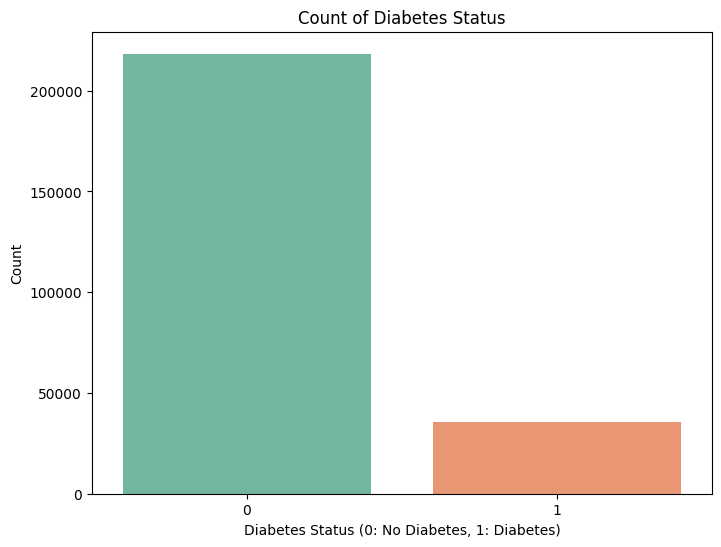

BMI         2.121991
MentHlth    2.721132
PhysHlth    2.207382
Age        -0.359901
dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify continuous features in the dataset
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Set up the figure for histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Show the histogram plots
plt.tight_layout()
plt.show()

# Set up the figure for box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[feature], color='lightgreen')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

# Show the box plot
plt.tight_layout()
plt.show()


# Count plot for target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_binary', palette='Set2')
plt.title('Count of Diabetes Status')
plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()


from scipy.stats import skew

skew_values = df[continuous_features].apply(skew)
print(skew_values)


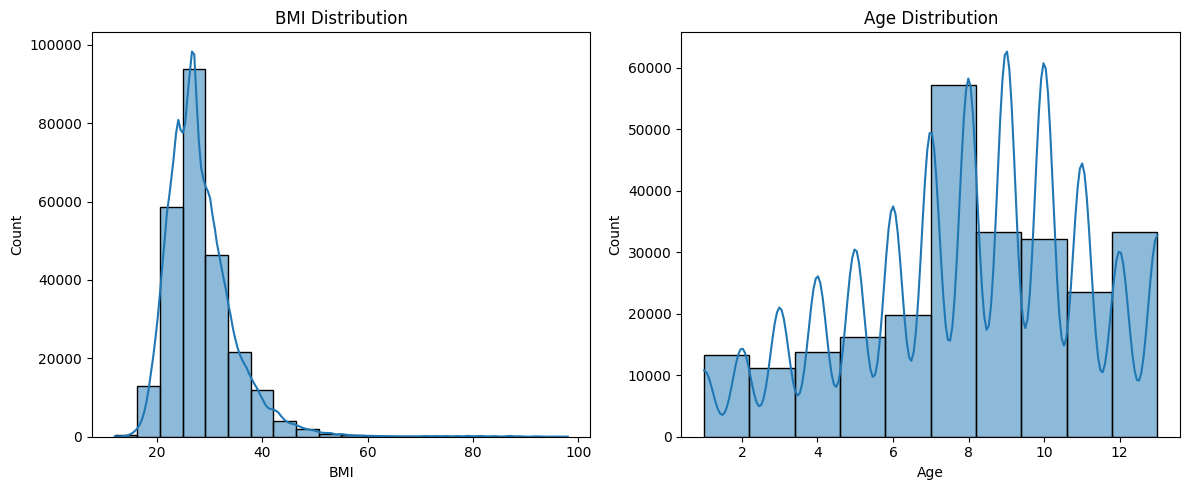

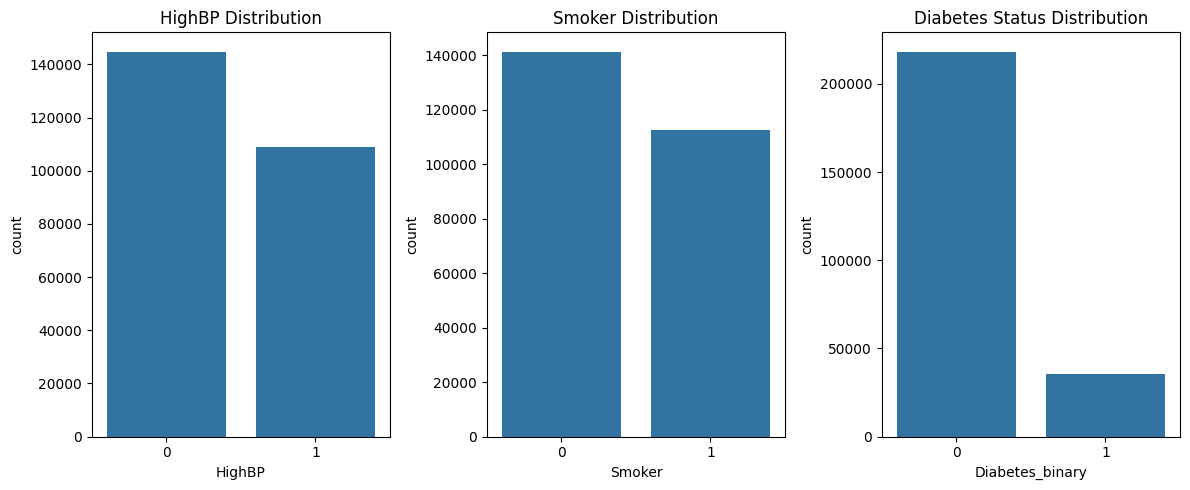

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of continuous variables (e.g., BMI and Age)
plt.figure(figsize=(12, 5))

# BMI distribution
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title('BMI Distribution')

# Age distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

# Plotting the distribution of categorical variables (e.g., HighBP, Smoker, Diabetes Status)
plt.figure(figsize=(12, 5))

# HighBP distribution
plt.subplot(1, 3, 1)
sns.countplot(x='HighBP', data=df)
plt.title('HighBP Distribution')

# Smoker distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Smoker', data=df)
plt.title('Smoker Distribution')

# Diabetes Status distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Diabetes Status Distribution')

plt.tight_layout()
plt.show()


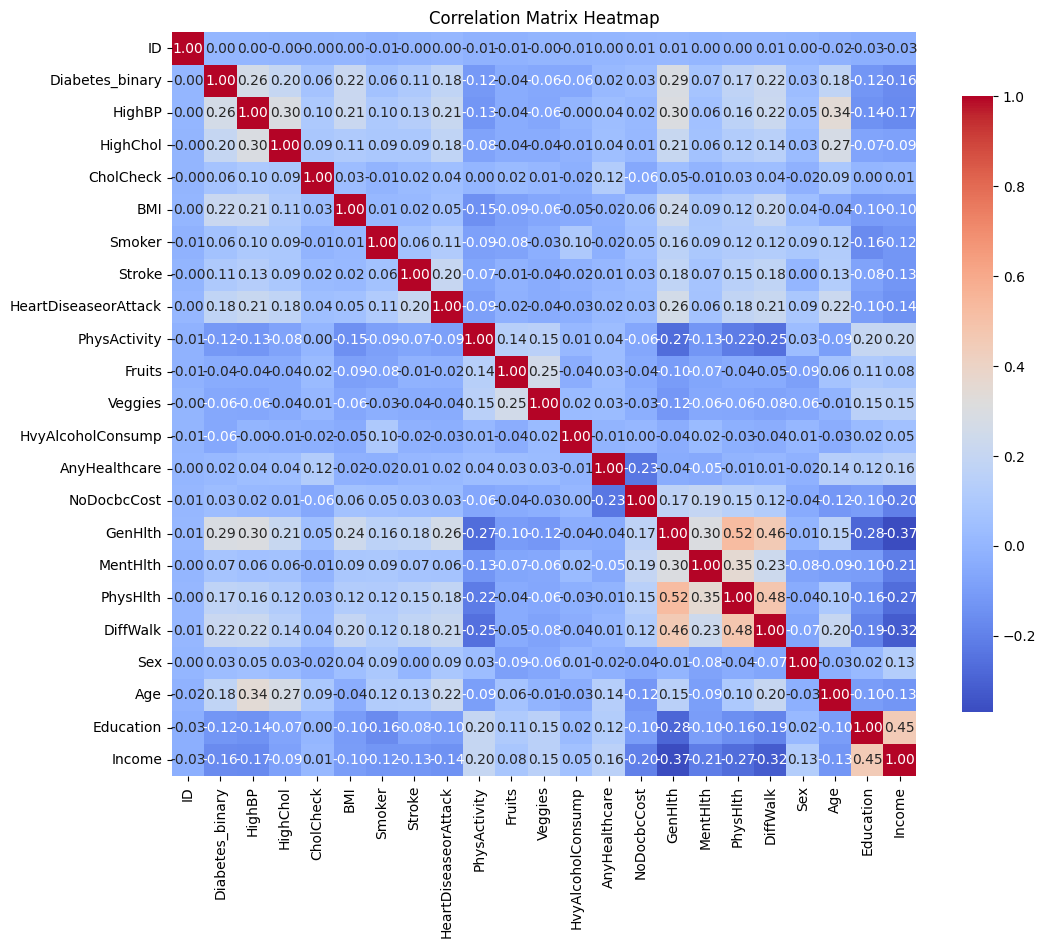

Correlation of Diabetes_binary with other variables:
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
ID                      0.004268
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [21]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


# Showing the correlation of BMI with other variables
print("Correlation of Diabetes_binary with other variables:")
print(correlation_matrix['Diabetes_binary'].sort_values(ascending=False))
